In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [12]:
data = pd.read_csv('house_price.csv')

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
data['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [40]:
def plotting(data,var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    #Histogram
    data[var].hist(bins=20)
    #Displot
    plt.subplot(1,3,2)
    data[var].plot(kind='kde',color='r')
    #Probplot
    plt.subplot(1,3,3)
    stats.probplot(data[var],plot=plt)
    plt.show()

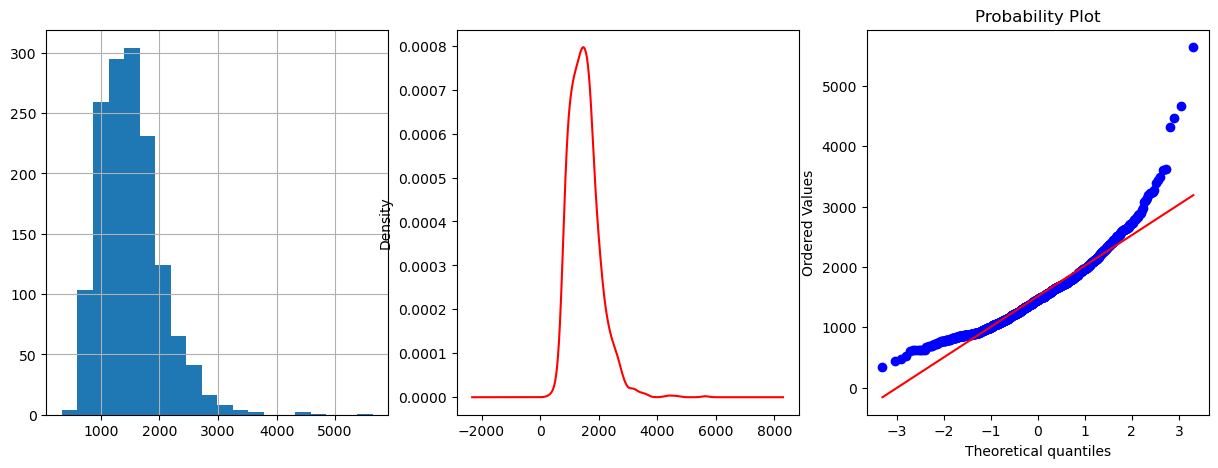

In [41]:
plotting(data,'GrLivArea')

In [ ]:
#LogTransformation

In [42]:
data['GrLivArea_log']=np.log(data['GrLivArea'])

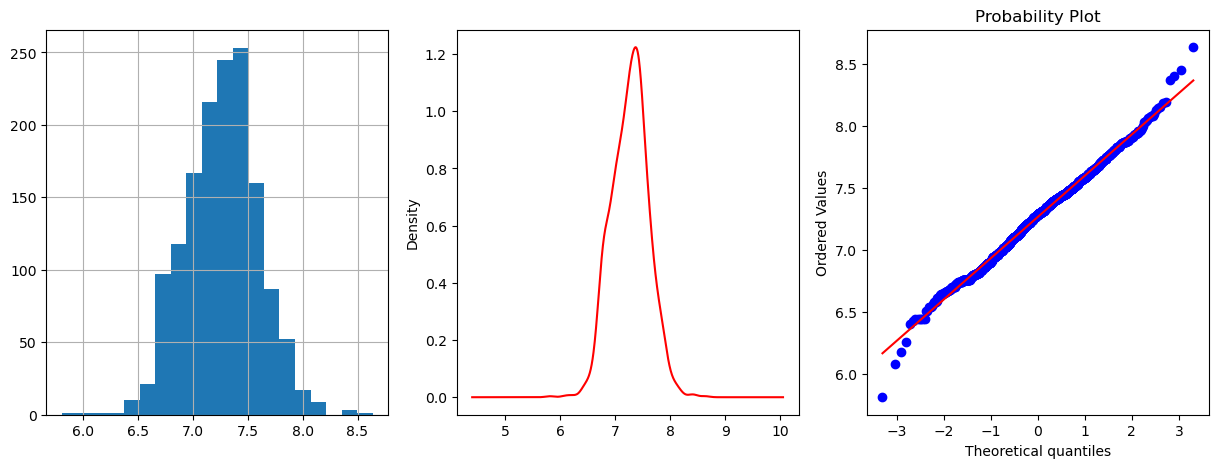

In [43]:
plotting(data,'GrLivArea_log')

In [ ]:
#Reciprocal transformation = 1 / each value

In [33]:
data['GrLivArea_reci']=(1/data['GrLivArea'])

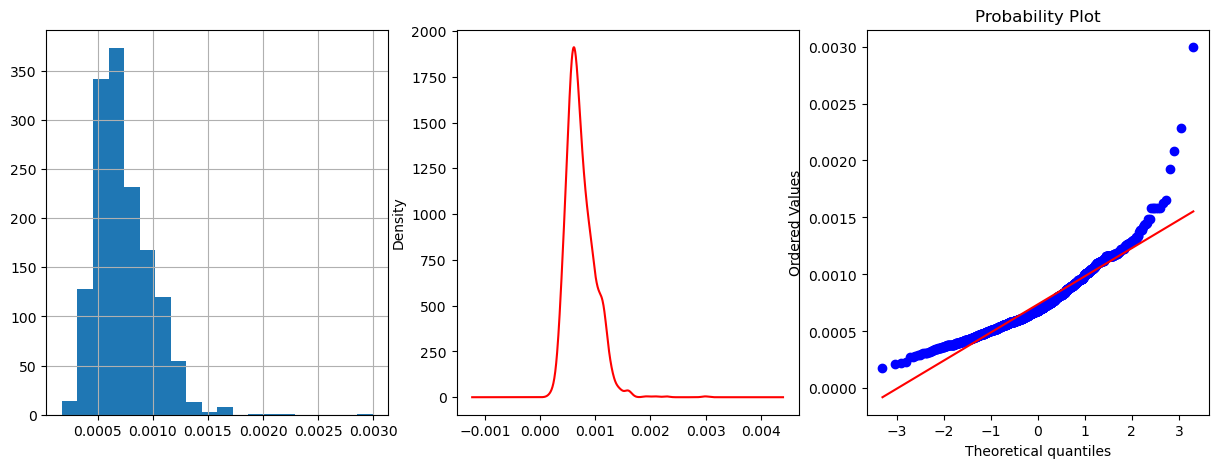

In [44]:
plotting(data,'GrLivArea_reci')

In [ ]:
#Square Root Technique

In [46]:
data['GrLivArea_sqrt']=np.sqrt(data['GrLivArea'])

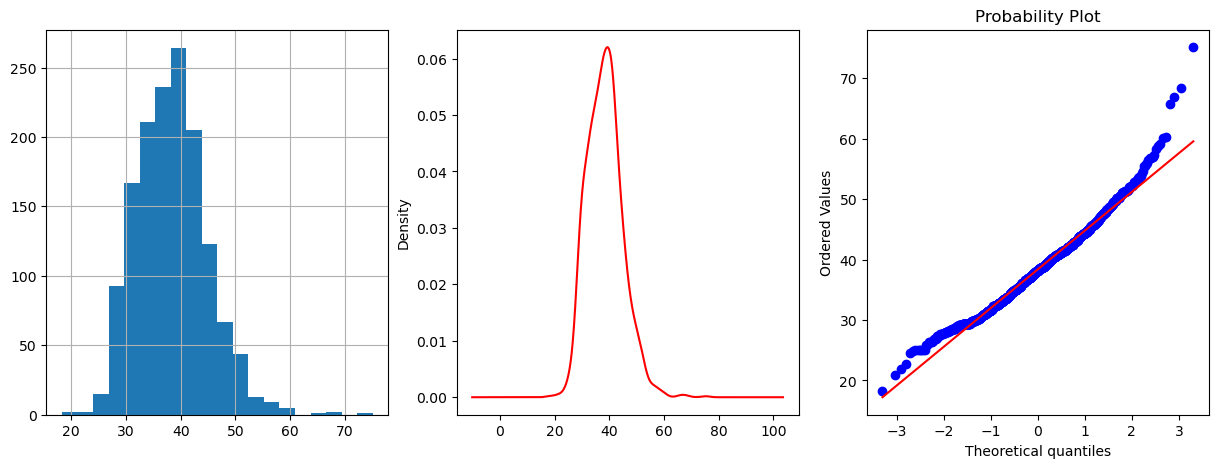

In [47]:
plotting(data,'GrLivArea_sqrt')

In [ ]:
#BoXcoX

In [48]:
data['GrLivArea_box'],lambda_=stats.boxcox(data['GrLivArea'])

In [51]:
lambda_

0.006304924353543215

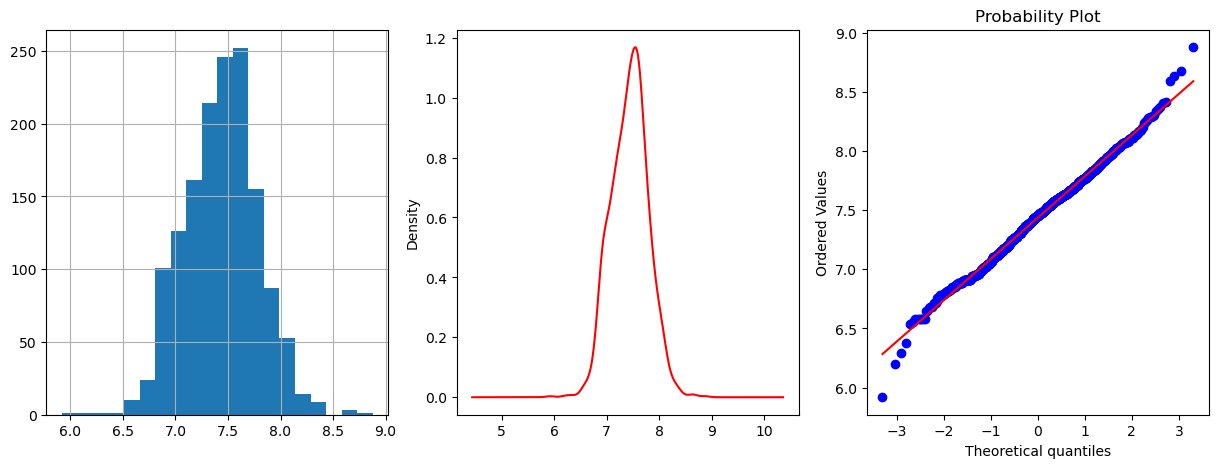

In [49]:
plotting(data,'GrLivArea_box')

In [ ]:
#Yeo-Johnson

In [53]:
data['GrLivArea_yeo'],lambda_=stats.yeojohnson(data['GrLivArea'])

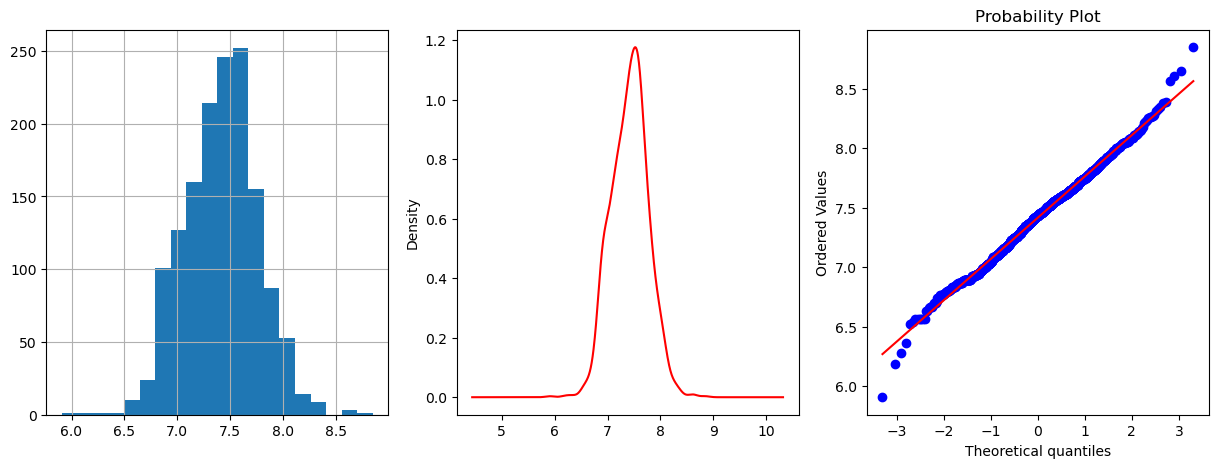

In [54]:
plotting(data,'GrLivArea_yeo')

original


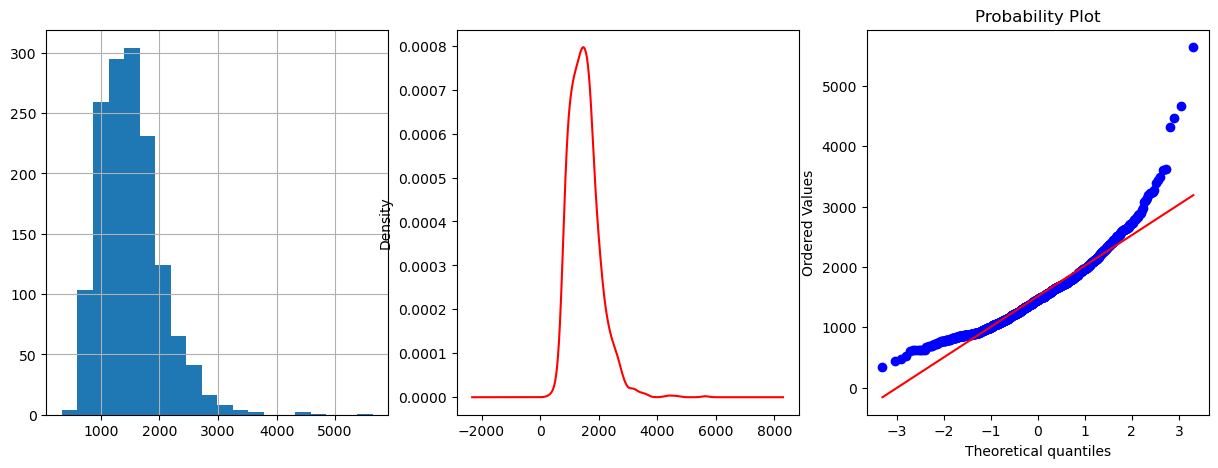

log


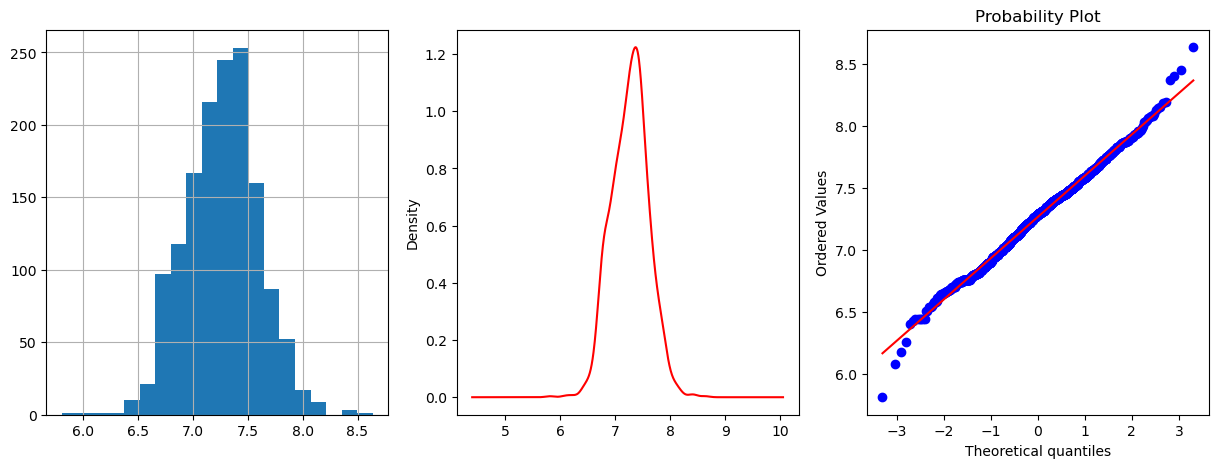

sqrt_method


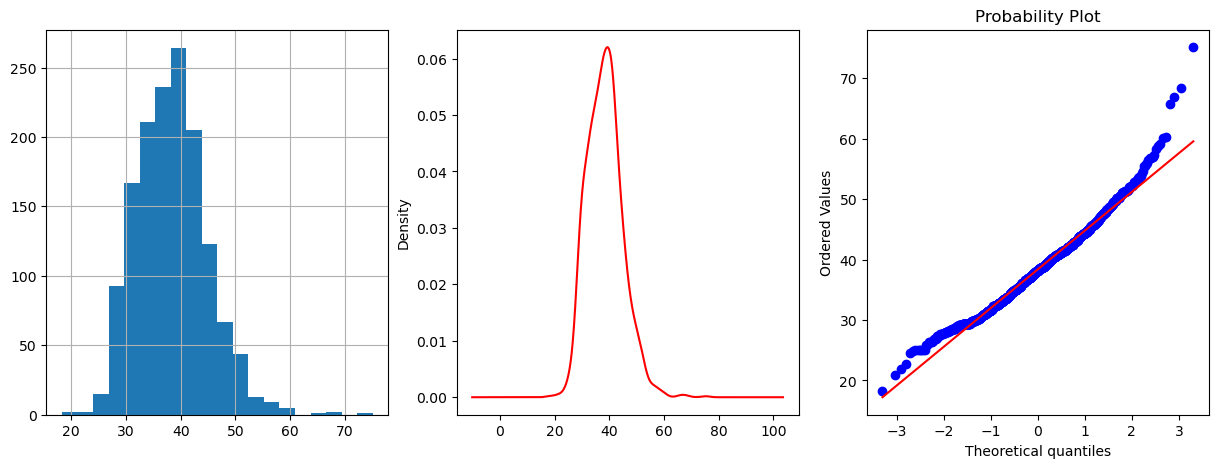

BoxCox_method


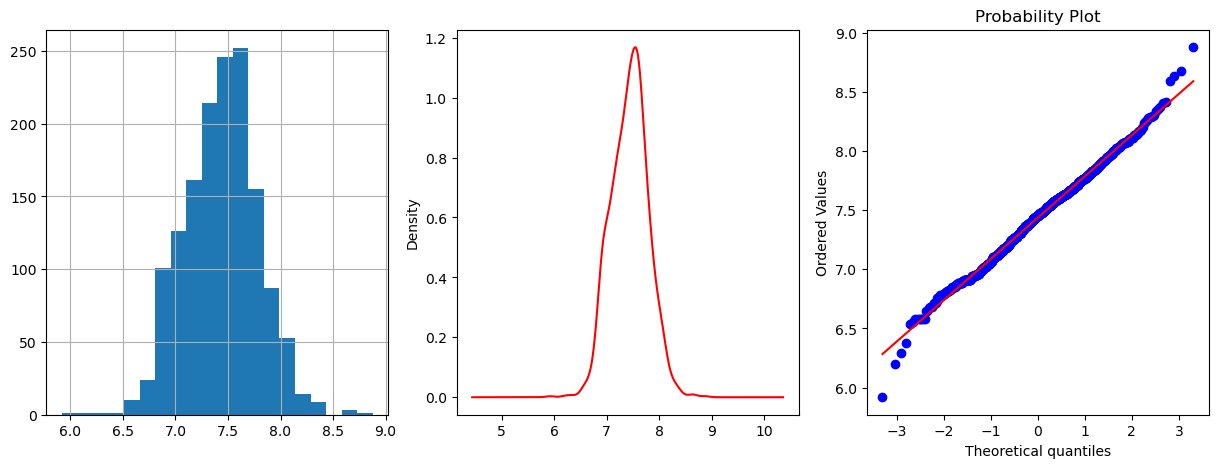

Yeo-Johnshon


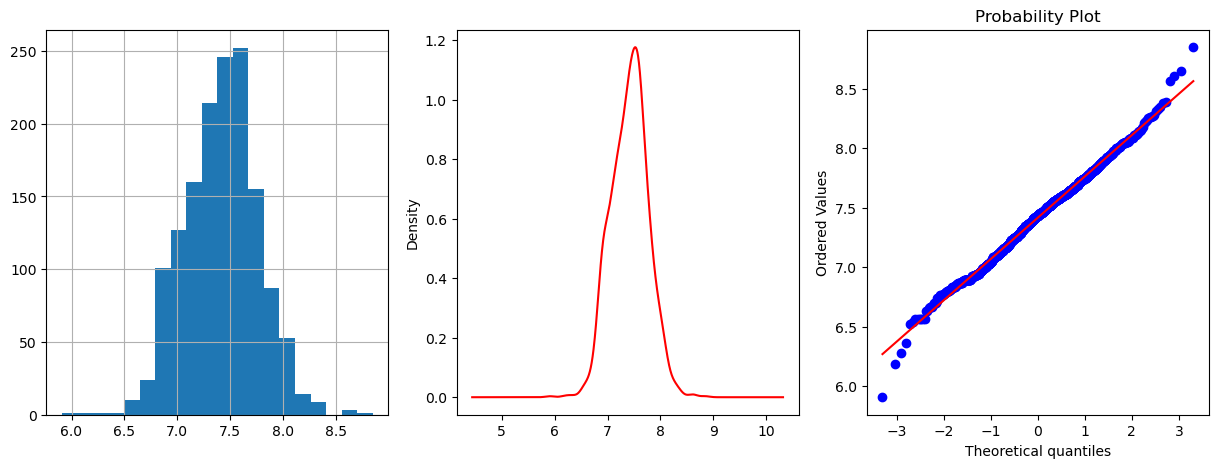

In [63]:
for i in data.columns:
    if i=='GrLivArea':
     print('original')
     plotting(data,'GrLivArea')
     print('log')
     data['GrLivArea_log']=np.log(data['GrLivArea'])
     plotting(data,'GrLivArea_log')
     print('sqrt_method')
     data['GrLivArea_sqrt']=np.sqrt(data['GrLivArea'])
     plotting(data,'GrLivArea_sqrt')
     print('BoxCox_method')   
     data['GrLivArea_box'],lambda_=stats.boxcox(data['GrLivArea'])
     plotting(data,'GrLivArea_box')
     print('Yeo-Johnshon')
     data['GrLivArea_yeo'],lambda_=stats.yeojohnson(data['GrLivArea'])
     plotting(data,'GrLivArea_yeo')   
     